#Atividade para ser entregue.

1- No dataset a seguir, rode o SVM e o Random Forest. Encontre os melhores parâmetros usando o GridSearch. Use o Cross Validation fazer o split do dataset.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv'
df= pd.read_csv(url)

df = df[['tweet', 'class']]

df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print(X_train.shape)
print(y)

(17348, 35852)
0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64


Shape treino: (17348, 35852)
Classes: [2 1 0]
Fitting 5 folds for each of 12 candidates, totalling 60 fits

🔍 Melhores parâmetros SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 6 candidates, totalling 30 fits

🔍 Melhores parâmetros RF: {'max_depth': None, 'n_estimators': 100}

📊 Relatório SVM:
              precision    recall  f1-score   support

           0       0.40      0.32      0.35       427
           1       0.93      0.94      0.94      5747
           2       0.84      0.86      0.85      1261

    accuracy                           0.89      7435
   macro avg       0.72      0.71      0.71      7435
weighted avg       0.89      0.89      0.89      7435


📊 Relatório Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.08      0.14       427
           1       0.87      0.98      0.92      5747
           2       0.88      0.60      0.71      1261

    accuracy                           0.86  

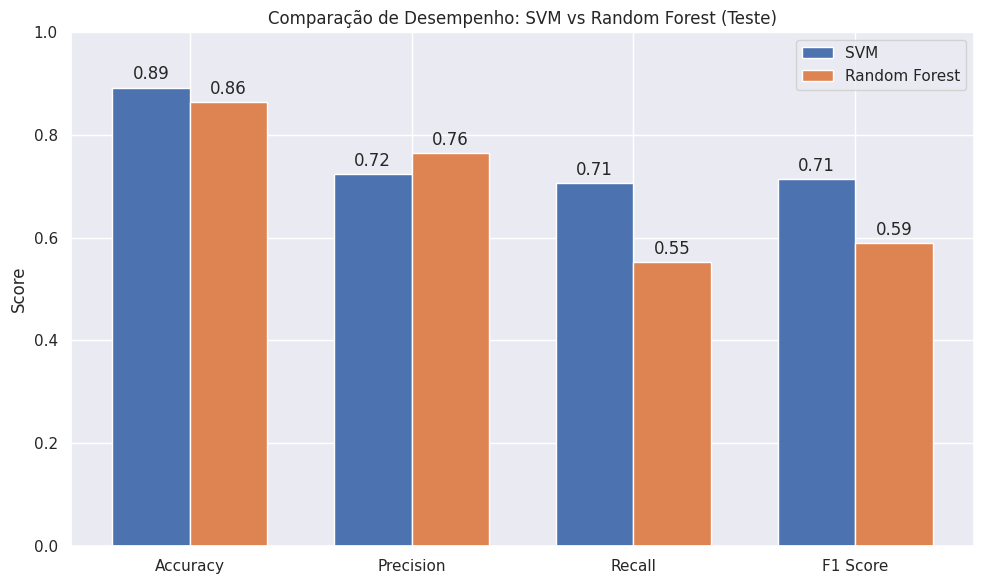

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregando o dataset
url = 'https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv'
df = pd.read_csv(url)
df = df[['tweet', 'class']]

# 2. Vetorização com CountVectorizer e divisão do dataset
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape treino:", X_train.shape)
print("Classes:", y.unique())

# 3. SVM com GridSearch
svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)
print("\n🔍 Melhores parâmetros SVM:", grid_svm.best_params_)

# 4. Random Forest com GridSearch
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("\n🔍 Melhores parâmetros RF:", grid_rf.best_params_)

# 5. Avaliação nos dados de teste
y_pred_svm = grid_svm.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)

print("\n📊 Relatório SVM:")
print(classification_report(y_test, y_pred_svm))

print("\n📊 Relatório Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 6. Gráfico comparativo
def compute_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1 Score': f1_score(y_true, y_pred, average='macro'),
    }

metrics_svm = compute_metrics(y_test, y_pred_svm)
metrics_rf = compute_metrics(y_test, y_pred_rf)

labels = list(metrics_svm.keys())
svm_scores = [metrics_svm[l] for l in labels]
rf_scores = [metrics_rf[l] for l in labels]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, svm_scores, width, label='SVM')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

ax.set_ylabel('Score')
ax.set_title('Comparação de Desempenho: SVM vs Random Forest (Teste)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 1)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


2- Rode o grid search para encontrar a melhor combinação do  `gamma`  sabendo que o kernel RBF se ajusta bem com o valor de `C` igual à 10.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1. Carrega o dataset
url = 'https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv'
df = pd.read_csv(url)
df = df[['tweet', 'class']]

# 2. Vetoriza os textos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y = df['class']

# 3. Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape de treino:", X_train.shape)
print("Classes:", y.unique())

# 4. GridSearch para gamma com C fixo em 10
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

svc_rbf = SVC(kernel='rbf', C=10)
grid = GridSearchCV(svc_rbf, param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

# 5. Resultados
print("\n🔍 Melhor parâmetro gamma encontrado:", grid.best_params_)
print("\n📊 Avaliação no conjunto de teste:")
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


Shape de treino: (17348, 35852)
Classes: [2 1 0]
Fitting 5 folds for each of 5 candidates, totalling 25 fits

🔍 Melhor parâmetro gamma encontrado: {'gamma': 0.01}

📊 Avaliação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.50      0.15      0.23       427
           1       0.93      0.96      0.95      5747
           2       0.84      0.91      0.87      1261

    accuracy                           0.91      7435
   macro avg       0.76      0.67      0.68      7435
weighted avg       0.89      0.91      0.89      7435



3- Compare com o método Random Forest. Qual teve o melhor F1 (se teve algum)?

###**Análise Comparativa: SVM vs. Random Forest**

Vamos comparar os **valores de F1-score** obtidos pelos modelos com base nas saídas dos relatórios:

---

###**Resumo dos F1-Scores por Classe**

| Classe        | SVM (Q1) | RF (Q1) | SVM com gamma otimizado (Q2) |
| ------------- | -------- | ------- | ---------------------------- |
| 0             | 0.35     | 0.14    | 0.23                         |
| 1             | 0.94     | 0.92    | 0.95                         |
| 2             | 0.85     | 0.71    | 0.87                         |
| **Macro Avg** | **0.71** | 0.59    | **0.68**                     |
| **Accuracy**  | 0.89     | 0.86    | **0.91**                     |

---

### **Conclusões**

* **SVM teve o melhor desempenho geral**, especialmente com o parâmetro `gamma=0.01` no kernel RBF:

  * Atingiu a **maior acurácia (91%)** e **maior F1-score médio ponderado (0.89)**.
  * O desempenho na **classe minoritária (classe 0)** ainda é fraco (o que é comum com classes desbalanceadas), mas mesmo assim, supera o Random Forest.

* **Random Forest teve o pior F1 na classe 0** (apenas 0.14), indicando dificuldade em lidar com a classe minoritária.

  * Apesar de boa precisão para a classe majoritária (classe 1), o F1 macro médio foi o mais baixo (**0.59**), sugerindo **desempenho desbalanceado entre as classes**.

---

### **Resposta Direta à Questão 3:**

> **O SVM obteve o melhor F1-score, especialmente com o kernel RBF e `gamma=0.01`. Ele superou o Random Forest tanto em F1 macro quanto em acurácia geral. Portanto, sim, houve um método com melhor F1: o SVM.**
